# [프로젝트] 서울 부동산 전월세가 분석하기

---

## 프로젝트 개요

월세 계약을 앞두고, 어떤 조건이 적절한지 고민되신 적 있나요? 사람들은 어떤 지역, 어떤 조건으로 주택을 임대하고 있을까요?

>“서울에서 가장 활발한 임대 거래 지역은 어디일까?”     
>"임대 계약은 주로 언제 많이 이뤄질까?”     
>“월세와 보증금의 관계는 어떤 패턴이 있을까?”      

이번 프로젝트에서는 서울의 부동산 전월세가 데이터를 통해 거래량과 임대료 현황을 분석합니다.    
지역, 건물 용도, 계약 유형 등 다양한 기준으로 부동산 시장을 들여다보며, 데이터 속 숨겨진 인사이트를 함께 찾아보아요!

---

## 프로젝트 목표

- 서울 부동산 전월세가 데이터를 바탕으로 월별 거래량, 건물 용도별 임대료 및 계약 기간 분석
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 시각화 방법 및 통계 기초 학습

---

## 데이터 출처

서울 열린데이터 광장 - 서울시 부동산 전월세가 정보      
https://data.seoul.go.kr/dataList/OA-21276/S/1/datasetView.do

---

## 목차

1. 데이터 읽기   
2. 데이터 정제하기   
3. 데이터 분석하기     
    3.1. 지역별 전월세 거래량 및 임대료 분석     
    3.2. 건물 용도별 거래량 및 임대료 분석    
    3.3. 층별 거래량 및 임대료 분석     
    3.4. 임대면적 및 건축년도에 따른 임대료 분석     
    3.5. 월별 거래량 변화 시각화     
    3.6. 계약 기간 및 신규 계약 여부 분석    
    3.7. 월세 보증금과 임대료의 상관관계 분석    
4. 퀴즈 제출하기

---

## 1. 데이터 읽기

### 1.1. 데이터 불러오기

이번 프로젝트에 필요한 라이브러리를 불러옵니다.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from itertools import chain
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
from matplotlib import cm
import seaborn as sns
import folium
import numpy as np

분석에 사용할 데이터는 2024년 서울시 부동산 전월세가 데이터입니다.

In [2]:
# 전월세가 데이터 불러오기
rental_df = pd.read_csv('data/서울특별시_전월세가_2024.csv')

# 상위 5개 행 확인
rental_df.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2024,11650,서초구,10100,방배동,1.0,대지,770.0,1.0,6.0,20231105,전세,80.33,50000,0,삼호1동~3동,1975.0,아파트,23.11~25.11,갱신,○,70000.0,NaN
1,2024,11680,강남구,11200,자곡동,1.0,대지,658.0,0.0,6.0,20231106,월세,24.12,1000,80,강남힐스테이트에코,2014.0,오피스텔,23.12~24.12,신규,NaN,0.0,0.0
2,2024,11710,송파구,11300,거여동,1.0,대지,136.0,0.0,1.0,20231106,전세,84.96,44000,0,삼호아파트,1999.0,아파트,23.12~25.12,신규,NaN,0.0,NaN
3,2024,11440,마포구,10400,도화동,1.0,대지,2.0,11.0,2.0,20231106,월세,28.01,17000,60,구인경하우스,2021.0,연립다세대,23.12~25.12,신규,NaN,0.0,0.0
4,2024,11740,강동구,10100,명일동,1.0,대지,312.0,171.0,3.0,20231106,전세,48.37,27000,0,해피빌리지,2003.0,연립다세대,24.01~26.01,신규,NaN,0.0,NaN


`rental_df`의 각 컬럼 정보를 확인해 봅시다.

In [3]:
# 전월세가 데이터 컬럼 정보 확인
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521985 entries, 0 to 521984
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   접수년도     521985 non-null  int64  
 1   자치구코드    521985 non-null  int64  
 2   자치구명     521985 non-null  object 
 3   법정동코드    521985 non-null  int64  
 4   법정동명     521985 non-null  object 
 5   지번구분코드   399005 non-null  float64
 6   지번구분     399005 non-null  object 
 7   본번       399076 non-null  float64
 8   부번       399076 non-null  float64
 9   층        399008 non-null  float64
 10  계약일      521985 non-null  int64  
 11  전월세구분    521976 non-null  object 
 12  임대면적     521985 non-null  float64
 13  보증금(만원)  521985 non-null  int64  
 14  임대료(만원)  521985 non-null  int64  
 15  건물명      399035 non-null  object 
 16  건축년도     484213 non-null  float64
 17  건물용도     521985 non-null  object 
 18  계약기간     497456 non-null  object 
 19  신규계약구분   498436 non-null  object 
 20  갱신청구권사용  32438 non-null   

각 거래별 계약일, 전월세 구분, 임대면적, 임대료, 건축년도 등의 정보가 포함되어 있네요.    
이제 분석에 사용할 주요 컬럼들을 세부적으로 살펴볼까요?

`자치구명`과 `법정동명` 열에는 각 거래별 건물 주소 정보가 담겨 있습니다. 

In [4]:
# 건물 주소 관련 컬럼 상위 5개 행 확인
rental_df[['자치구명', '법정동명']].head()

,자치구명,법정동명
0,서초구,방배동
1,강남구,자곡동
2,송파구,거여동
3,마포구,도화동
4,강동구,명일동


몇 층인지에 대한 정보도 `층` 열에 표시되어 있습니다.

In [5]:
# 층 고유값 확인
rental_df['층'].value_counts()

층
 3.0     49637
 2.0     47426
 4.0     44058
 5.0     35321
 6.0     24954
         ...  
 64.0        2
 57.0        2
 61.0        1
-4.0         1
 58.0        1
Name: count, Length: 65, dtype: int64

`계약일` 열은 각 거래가 이루어진 계약일을 의미합니다.

In [6]:
# 계약일 고유값 확인
rental_df['계약일'].value_counts()

계약일
20240113    2949
20240120    2881
20240106    2769
20240217    2757
20240127    2725
            ... 
20250106       1
20250105       1
20250104       1
20250101       1
20250401       1
Name: count, Length: 479, dtype: int64

`전월세구분` 열에는 해당 거래의 '월세' 혹은 '전세' 계약 여부가 기록되어 있습니다.

In [7]:
# 전월세 구분 고유값 확인
rental_df['전월세구분'].value_counts()

전월세구분
월세    294597
전세    227379
Name: count, dtype: int64

`임대면적` 열의 단위는 ㎡입니다.

In [8]:
# 임대 면적 고유값 확인
rental_df['임대면적'].value_counts()

임대면적
20.000     6554
18.000     5841
30.000     5536
84.980     4534
84.990     3715
           ... 
59.435        1
98.710        1
163.350       1
97.710        1
122.210       1
Name: count, Length: 17588, dtype: int64

각 거래의 `임대료(만원)`과 `보증금(만원)` 정보도 확인할 수 있습니다.

In [9]:
# 임대료 관련 컬럼 상위 5개 행 확인
rental_df[['임대료(만원)', '보증금(만원)']].head()

,임대료(만원),보증금(만원)
0,0,50000
1,80,1000
2,0,44000
3,60,17000
4,0,27000


거래 건물의 `건물명`과 `건축년도` 열에는 건물 정보가 담겨 있습니다.

In [10]:
# 건물명과 건축년도 상위 5개 행 확인
rental_df[['건물명', '건축년도']].head()

,건물명,건축년도
0,삼호1동~3동,1975.0
1,강남힐스테이트에코,2014.0
2,삼호아파트,1999.0
3,구인경하우스,2021.0
4,해피빌리지,2003.0


`건물용도`는 아파트 / 단독다가구 / 연립다세대 / 오피스텔로 구분됩니다. 

In [11]:
# 건물 용도 고유값 확인
rental_df['건물용도'].value_counts()

건물용도
아파트      202966
단독다가구    122977
연립다세대    120884
오피스텔      75158
Name: count, dtype: int64

`계약기간` 열에는 시작월과 종료월이 '24.08~26.08'와 같은 형태의 텍스트로 저장되어 있습니다.    
추후 분석을 위해서는 계약 기간을 시작월과 종료월로 구분해 저장하는 것이 좋겠습니다.

In [12]:
# 계약기간 상위 5개 행 확인
rental_df['계약기간'].head()

0    23.11~25.11
1    23.12~24.12
2    23.12~25.12
3    23.12~25.12
4    24.01~26.01
Name: 계약기간, dtype: object

이렇게 서울 부동산 전월세가 데이터를 모두 살펴보았습니다.    
그럼 잘 이해했는지 간단히 점검해 봅시다! 전월세가 데이터에서 아래의 행을 어떻게 해석할 수 있을까요?

In [13]:
# 특정 행 출력
rental_df.loc[1, ['자치구명', '법정동명', '건물명', '층', '전월세구분', '계약기간', '임대료(만원)', '보증금(만원)']]

자치구명               강남구
법정동명               자곡동
건물명          강남힐스테이트에코
층                  6.0
전월세구분               월세
계약기간       23.12~24.12
임대료(만원)             80
보증금(만원)           1000
Name: 1, dtype: object

>강남구 자곡동 강남힐스테이트에코 6층의 월세 계약은 보증금 1000만원 월세 80만원 이며, 계약 기간은 23년 12월에서 24년 12월까지이다.

다음 섹션에서는 위에서 살펴본 내용에 기반하여 데이터를 분석에 용이하도록 직접 정제해 보도록 하겠습니다.

---

## 2. 데이터 정제하기

### 2.1. 건축년도 이상치 수정

`rental_df`의 `건축년도`의 고유값을 확인해보면, '998'이라는 값이 있습니다.

In [14]:
# 건축년도 고유값 확인
rental_df['건축년도'].value_counts().sort_index(ascending=True)

건축년도
998.0         2
1920.0        1
1922.0        4
1924.0        1
1927.0        3
          ...  
2021.0    17681
2022.0    17076
2023.0    11861
2024.0     7485
2025.0        4
Name: count, Length: 101, dtype: int64

998은 1998의 오타인 것으로 보입니다.     
다음과 같이 '998'을 '1998'로 수정해 줍시다.

In [15]:
# 건축년도 998을 1998로 변경
rental_df.loc[rental_df['건축년도'] == 998, '건축년도'] = 1998

In [16]:
# 건축년도 고유값 확인
rental_df['건축년도'].value_counts().sort_index(ascending=True)

건축년도
1920.0        1
1922.0        4
1924.0        1
1927.0        3
1928.0        2
          ...  
2021.0    17681
2022.0    17076
2023.0    11861
2024.0     7485
2025.0        4
Name: count, Length: 100, dtype: int64

이제 998이라는 값이 1998로 변환된 것을 확인할 수 있습니다.

---

### 2.2. 계약일 및 계약 기간 정보를 `datetime` 타입으로 변환하기

`rental_df`의 계약일 관련 컬럼은 '20231105'과 같은 텍스트로 저장되어 있습니다.     
날짜와 시간을 다루기 편리한 형태로 만들기 위해 `datetime` 타입으로 변환해 봅시다.

>📌 `pandas.to_datetime()`은 문자열 형태의 날짜 데이터를 `datetime` 형식으로 변환하여, 날짜 계산이나 시계열 분석이 가능하도록 만듭니다.

먼저 기존 `계약일` 열의 값 형태를 다시 확인해 봅시다.

In [17]:
# 계약일 상위 5개 행 확인
rental_df['계약일'].head()

0    20231105
1    20231106
2    20231106
3    20231106
4    20231106
Name: 계약일, dtype: int64

`계약일` 컬럼 전체를 '2023-11-05'와 같은 `datetime` 타입으로 변환해 볼까요?

In [18]:
rental_df['계약일'] = pd.to_datetime(rental_df['계약일'], format='%Y%m%d')
rental_df['계약일'].head()

0   2023-11-05
1   2023-11-06
2   2023-11-06
3   2023-11-06
4   2023-11-06
Name: 계약일, dtype: datetime64[ns]

데이터 타입이 잘 변환된 것을 확인할 수 있습니다.

이어서, `계약기간` 컬럼도 분석에 편리하도록 수정해 봅시다.     
'23.11~25.11'로 되어있는 값을 '2023-11-01', '2025-11-01'과 같이 시작일과 종료일로 구분하여 새로운 열에 저장해 보겠습니다.     
먼저 기존 `계약기간` 열의 값 형태를 다시 확인해 봅시다.

In [19]:
# 계약기간 상위 5개 행 확인
rental_df['계약기간'].head()

0    23.11~25.11
1    23.12~24.12
2    23.12~25.12
3    23.12~25.12
4    24.01~26.01
Name: 계약기간, dtype: object

`계약기간`의 결측치를 제외한 나머지 행만을 골라 처리하기 위해, '결측치가 아닌 행'인지의 여부를 나타내는 `Series`를 생성해줍니다.

In [20]:
# 계약기간 있는 행만 처리
mask = rental_df['계약기간'].notna()
mask

0         True
1         True
2         True
3         True
4         True
          ... 
521980    True
521981    True
521982    True
521983    True
521984    True
Name: 계약기간, Length: 521985, dtype: bool

이제 이 `mask`를 통해 값이 `True`에 해당하는 인덱스, 즉 실제로 값이 있는 경우만 지정하여 작업할 수 있습니다.      
`loc()`을 통해 결측치가 아닌 행만 지정하여 '~'라는 기호를 기준으로 텍스트를 구분해 봅시다.

In [21]:
# 계약기간 분리
split_df = rental_df.loc[mask, '계약기간'].str.split('~', expand=True)
split_df.columns = ['계약시작', '계약종료']
split_df.head()

,계약시작,계약종료
0,23.11,25.11
1,23.12,24.12
2,23.12,25.12
3,23.12,25.12
4,24.01,26.01


'23.11~25.11'이 '23.11'과 '25.11'로 잘 구분된 것을 확인할 수 있습니다.    
다음으로 이렇게 구분된 데이터를 `datetime` 타입으로 변환해 줍시다.

In [22]:
# 날짜 문자열 처리 및 datetime 변환
split_df['계약시작'] = pd.to_datetime('20' + split_df['계약시작'].astype(str), format='%Y.%m', errors='coerce')
split_df['계약종료'] = pd.to_datetime('20' + split_df['계약종료'].astype(str), format='%Y.%m', errors='coerce')
split_df.head()

,계약시작,계약종료
0,2023-11-01,2025-11-01
1,2023-12-01,2024-12-01
2,2023-12-01,2025-12-01
3,2023-12-01,2025-12-01
4,2024-01-01,2026-01-01


마지막으로 `rental_df`에 `계약시작`과 `계약종료`라는 새로운 컬럼을 만들어 볼까요?

In [23]:
# 계약시작 및 계약종료 컬럼 생성
rental_df.loc[mask, '계약시작'] = split_df['계약시작']
rental_df.loc[mask, '계약종료'] = split_df['계약종료']
rental_df['계약시작'] = pd.to_datetime(rental_df['계약시작'], errors='coerce')
rental_df['계약종료'] = pd.to_datetime(rental_df['계약종료'], errors='coerce')
rental_df[['계약기간', '계약시작', '계약종료']]

,계약기간,계약시작,계약종료
0,23.11~25.11,2023-11-01,2025-11-01
1,23.12~24.12,2023-12-01,2024-12-01
2,23.12~25.12,2023-12-01,2025-12-01
3,23.12~25.12,2023-12-01,2025-12-01
4,24.01~26.01,2024-01-01,2026-01-01
...,...,...,...
521980,25.03~25.06,2025-03-01,2025-06-01
521981,24.08~26.08,2024-08-01,2026-08-01
521982,24.09~26.09,2024-09-01,2026-09-01
521983,25.03~26.02,2025-03-01,2026-02-01


이처럼 '23.11~25.11' 형식의 계약 기간이 '2023-11-01', '2025-11-01'로 잘 분리된 것을 확인할 수 있습니다.     
이제부터 본격적으로 서울 부동산 전월세가 데이터를 분석해 볼까요?

---

## 3. 데이터 분석하기

### 3.1. 지역별 전월세 거래량 및 임대료 분석

>🏠 "서울에서 부동산 거래가 가장 활발한 지역은 어디일까?"

전월세가 데이터를 바탕으로 서울 자치구별 전월세 거래량 및 임대료 차이를 분석해 봅시다. 

먼저 `rental_df`에서 자치구 및 법정동별로 전세/월세의 거래 건수를 확인해 볼까요?      
`자치구명`, `법정동명`, `전월세구분` 컬럼을 기준으로 그룹화하여 각 그룹에 포함되는 거래 수를 계산해 봅시다.    
>📌 `groupby()`는 특정 컬럼을 기준으로 데이터를 그룹화한 뒤, 각 그룹에 집계, 변환, 필터 등의 연산을 적용할 수 있게 해줍니다.

In [24]:
# 지역 및 전월세구분 기준으로 그룹화하여 거래 수 계산
grouped = rental_df.groupby(['자치구명', '법정동명', '전월세구분']).size().reset_index(name='count')
grouped

,자치구명,법정동명,전월세구분,count
0,강남구,개포동,월세,1907
1,강남구,개포동,전세,2139
2,강남구,논현동,월세,2133
3,강남구,논현동,전세,1061
4,강남구,대치동,월세,2386
...,...,...,...,...
786,중랑구,상봉동,전세,1201
787,중랑구,신내동,월세,1280
788,중랑구,신내동,전세,1582
789,중랑구,중화동,월세,1013


거래량을 기준으로 내림차순 정렬하여 가장 거래량이 많은 지역이 어디인지 살펴볼까요?

In [25]:
# 거래량 기준 내림차순 정렬
grouped = grouped.sort_values(by='count', ascending=False)
grouped

,자치구명,법정동명,전월세구분,count
76,관악구,봉천동,월세,10822
78,관악구,신림동,월세,10472
72,강서구,화곡동,월세,7265
73,강서구,화곡동,전세,5166
64,강서구,마곡동,월세,5107
...,...,...,...,...
587,종로구,견지동,전세,1
239,서대문구,봉원동,전세,1
341,성북구,동소문동3가,전세,1
284,서초구,원지동,월세,1


거래량이 많은 곳은 관악구이고, 봉천동과 신림동의 월세 계약이 굉장히 많네요!     
대학가에서 월세 거래가 활발하다는 것을 짐작해볼 수 있습니다.

이번엔 지역별로 임대료의 평균을 계산해 봅시다.

In [26]:
# 지역별 임대료 평균 계산
grouped = rental_df.groupby(['자치구명', '법정동명', '전월세구분'])['임대료(만원)'].mean().reset_index(name='mean')
grouped

,자치구명,법정동명,전월세구분,mean
0,강남구,개포동,월세,142.701626
1,강남구,개포동,전세,0.000000
2,강남구,논현동,월세,101.571496
3,강남구,논현동,전세,0.000000
4,강남구,대치동,월세,132.130763
...,...,...,...,...
786,중랑구,상봉동,전세,0.011657
787,중랑구,신내동,월세,38.673437
788,중랑구,신내동,전세,0.000000
789,중랑구,중화동,월세,46.257651


월세 임대료의 평균을 기준으로 내림차순 정렬해 봅시다.

In [27]:
# 월세 임대료 평균 기준 내림차순 정렬
grouped_monthly_rent = grouped[grouped['전월세구분'] == '월세'].sort_values(by='mean', ascending=False)
grouped_monthly_rent

,자치구명,법정동명,전월세구분,mean
526,용산구,용산동5가,월세,413.000000
705,중구,남대문로5가,월세,406.666667
556,용산구,한남동,월세,319.194079
660,종로구,재동,월세,300.000000
693,종로구,홍파동,월세,258.457143
...,...,...,...,...
600,종로구,권농동,월세,35.000000
594,종로구,관철동,월세,31.303030
110,구로구,천왕동,월세,21.088621
450,영등포구,문래동1가,월세,17.250000


용산구 용산동5가의 평균 월세 임대료가 굉장히 높고, 임대료가 낮은 다른 지역과의 격차가 굉장히 큰 것을 확인할 수 있습니다.     

다음으로 보증금에 대해서도 지역별 평균을 구해볼까요?

In [28]:
# 지역별 보증금 평균 계산
grouped = rental_df.groupby(['자치구명', '법정동명', '전월세구분'])['보증금(만원)'].mean().reset_index(name='mean')
grouped

,자치구명,법정동명,전월세구분,mean
0,강남구,개포동,월세,27013.563713
1,강남구,개포동,전세,68574.980365
2,강남구,논현동,월세,8692.955931
3,강남구,논현동,전세,41919.435438
4,강남구,대치동,월세,32526.411987
...,...,...,...,...
786,중랑구,상봉동,전세,24983.522065
787,중랑구,신내동,월세,7308.143750
788,중랑구,신내동,전세,25764.152971
789,중랑구,중화동,월세,5876.344521


전세 보증금의 평균을 기준으로 내림차순 정렬해 봅시다.

In [29]:
# 전세 보증금 평균 기준 내림차순 정렬
grouped_key_money = grouped[grouped['전월세구분'] == '전세'].sort_values(by='mean', ascending=False)
grouped_key_money

,자치구명,법정동명,전월세구분,mean
527,용산구,용산동5가,전세,141655.555556
774,중구,회현동2가,전세,130000.000000
223,마포구,하중동,전세,125628.000000
706,중구,남대문로5가,전세,120666.666667
271,서초구,반포동,전세,116216.250556
...,...,...,...,...
237,서대문구,미근동,전세,11333.333333
339,성북구,동소문동2가,전세,11200.000000
665,종로구,종로6가,전세,11000.000000
525,용산구,용산동3가,전세,10474.333333


임대료와 마찬가지로 용산동5가의 평균 보증금이 가장 높은 것을 볼 수 있습니다.

지금부터는 실제 지도 위에 지역별 월세 임대료와 거래량을 시각화해 볼까요?    
먼저 자치구별 월세 임대료 평균을 계산합니다.


In [30]:
# 자치구별 월세 임대료 평균 계산
grouped = rental_df.groupby(['자치구명', '전월세구분'])['임대료(만원)'].mean().reset_index(name='mean')
grouped_monthly_rent = grouped[grouped['전월세구분'] == '월세'].sort_values(by='mean', ascending=False)
grouped_monthly_rent

,자치구명,전월세구분,mean
0,강남구,월세,120.434605
28,서초구,월세,116.079575
40,용산구,월세,107.742268
30,성동구,월세,99.834167
46,중구,월세,85.226115
34,송파구,월세,74.607644
24,마포구,월세,74.209918
44,종로구,월세,73.480193
20,동대문구,월세,65.944046
26,서대문구,월세,65.932109


이제 각 자치구별로 지도 위에 원형 마커를 표시하겠습니다.     
이때 임대료에 따라 색상의 진하기를 다르게 표현하면 좋겠네요!     
예를 들어 평균 임대료가 높을 수록 색상이 갈색에 가깝게 진해지고, 낮을 수록 노란색에 가깝게 옅어지도록 합니다.    
지도 시각화에는 `folium`이라는 라이브러리를 사용하며, 각 자치구별 위/경도 데이터는 아래와 같이 직접 지정해 줍니다.

>📌 `folium`은 지리 정보를 시각화할 수 있는 지도를 생성하는 라이브러리입니다.

In [31]:
# 자치구별 위/경도 데이터
geo_dict = {
    '강남구': [37.5172363, 127.0473248],
    '강동구': [37.5301251, 127.1237629],
    '강북구': [37.6396103, 127.025657],
    '강서구': [37.5509375, 126.8495382],
    '관악구': [37.4784063, 126.9516134],
    '광진구': [37.5384841, 127.0822931],
    '구로구': [37.4954856, 126.8874961],
    '금천구': [37.4600969, 126.9001546],
    '노원구': [37.6541917, 127.0567939],
    '도봉구': [37.6687686, 127.0471634],
    '동대문구': [37.5743681, 127.0396171],
    '동작구': [37.512409, 126.939252],
    '마포구': [37.5663244, 126.9014014],
    '서대문구': [37.5791158, 126.9367789],
    '서초구': [37.4837125, 127.0324113],
    '성동구': [37.5633415, 127.0360835],
    '성북구': [37.5894003, 127.0167035],
    '송파구': [37.5145431, 127.1065971],
    '양천구': [37.5169836, 126.8663985],
    '영등포구': [37.5263718, 126.8960577],
    '용산구': [37.5323669, 126.9906798],
    '은평구': [37.6176127, 126.9227004],
    '종로구': [37.5729503, 126.9793579],
    '중구': [37.5638437, 126.997602],
    '중랑구': [37.6063243, 127.0929866]
}

# 컬러맵 설정 (평균 임대료가 높을수록 진한 색)
colormap = cm.get_cmap('YlOrRd')

# 정규화 함수: 0~1 스케일로 변환
min_rent = grouped_monthly_rent['mean'].min()
max_rent = grouped_monthly_rent['mean'].max()
grouped_monthly_rent['norm'] = (grouped_monthly_rent['mean'] - min_rent) / (max_rent - min_rent)

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 마커 추가
for _, row in grouped_monthly_rent.iterrows():
    gu = row['자치구명']
    mean_rent = row['mean']
    norm_value = row['norm']
    location = geo_dict.get(gu)
    
    if location:
        color = cm.colors.rgb2hex(colormap(0.3 + norm_value * 0.7))  # RGB를 HEX로 변환
        folium.CircleMarker(
            location=location,
            radius=10,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            popup=folium.Popup(f"{gu}: {mean_rent:.2f}만원", parse_html=True),
            tooltip=f"{gu}: {mean_rent:.2f}만원"
        ).add_to(m)

m

/var/folders/hd/x78brj1j2zn2msbqhqqp8qs00000gn/T/ipykernel_19682/1344642785.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlOrRd')


위와 같이 각 자치구 위치에 마커가 표시되었고, 월세 임대료에 따라 색상의 진하기가 다르게 표현되었습니다.     
마우스를 마커 위에 올리면 자치구명과 임대료 값을 확인할 수 있습니다.    
강남구와 서초구의 평균 월세 임대료가 가장 높고, 관악구와 강서구의 임대료는 상대적으로 낮은 것을 확인할 수 있습니다.

이번에는 월세 임대료 대신 월세 '거래량'을 기준으로 시각화해 볼까요?

In [32]:
# 자치구별 월세 거래량 계산
grouped = rental_df.groupby(['자치구명', '전월세구분']).size().reset_index(name='counts')
grouped_monthly_rent = grouped[grouped['전월세구분'] == '월세'].sort_values(by='counts', ascending=False)
grouped_monthly_rent

,자치구명,전월세구분,counts
34,송파구,월세,24962
8,관악구,월세,22048
6,강서구,월세,20453
0,강남구,월세,17593
24,마포구,월세,16535
10,광진구,월세,15190
38,영등포구,월세,15006
2,강동구,월세,14209
22,동작구,월세,12649
28,서초구,월세,12039


위 데이터를 다음과 같이 시각화해 봅시다.

In [33]:
# 정규화 함수: 0~1 스케일로 변환
min_rent = grouped_monthly_rent['counts'].min()
max_rent = grouped_monthly_rent['counts'].max()
grouped_monthly_rent['norm'] = (grouped_monthly_rent['counts'] - min_rent) / (max_rent - min_rent)

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 마커 추가
for _, row in grouped_monthly_rent.iterrows():
    gu = row['자치구명']
    counts_rent = row['counts']
    norm_value = row['norm']
    location = geo_dict.get(gu)
    
    if location:
        color = cm.colors.rgb2hex(colormap(0.3 + norm_value * 0.7))  # RGB를 HEX로 변환
        folium.CircleMarker(
            location=location,
            radius=10,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            tooltip=f"{gu}: {counts_rent}건"
        ).add_to(m)

m

앞선 임대료 기준 시각화 지도와 비교해보면, 임대료가 낮았던 관악구와 강서구의 월세 거래량이 굉장히 많은 것을 볼 수 있습니다.    
한편 임대료가 상대적으로 높았던 용산구의 월세 거래량은 별로 많지 않네요.

---

### 3.2. 건물 용도별 거래량 및 임대료 분석

>🏙️ "아파트와 오피스텔 중 임대료와 보증금이 더 저렴한 곳은 어디일까?"    

건물 용도별 거래량 및 임대료의 차이를 분석해 봅니다.

먼저 건물 용도별 거래량을 비교해 볼까요?     
`rental_df`에서 `건물용도`를 기준으로 그룹화하여 거래 수를 계산합니다.

In [34]:
# 건물 용도별 거래량 계산
grouped = rental_df.groupby(['건물용도']).size().reset_index(name='counts')
grouped

,건물용도,counts
0,단독다가구,122977
1,아파트,202966
2,연립다세대,120884
3,오피스텔,75158


전월세를 합친 거래량은 아파트가 가장 많았고, 오피스텔이 가장 적었습니다.  


이번엔 건물 용도별 월세 임대료와 전세 보증금을 각각 계산해 볼까요?

In [35]:
# 건물 용도별 월세 임대료 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '월세')
]

grouped_monthly_rent = filtered_df.groupby(['건물용도'])['임대료(만원)'].mean().reset_index(name='월세')
grouped_monthly_rent

,건물용도,월세
0,단독다가구,50.423577
1,아파트,103.065490
2,연립다세대,53.416991
3,오피스텔,63.217736


In [36]:
# 건물 용도별 전세 보증금 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '전세')
]

grouped_key_money = filtered_df.groupby(['건물용도'])['보증금(만원)'].mean().reset_index(name='전세')
grouped_key_money

,건물용도,전세
0,단독다가구,14536.939860
1,아파트,56112.138504
2,연립다세대,22951.612351
3,오피스텔,24281.860356


두 데이터를 건물 용도를 기준으로 병합해 줍니다.

In [37]:
# 데이터 병합
merged_df = pd.merge(grouped_monthly_rent, grouped_key_money, on='건물용도')
merged_df

,건물용도,월세,전세
0,단독다가구,50.423577,14536.939860
1,아파트,103.065490,56112.138504
2,연립다세대,53.416991,22951.612351
3,오피스텔,63.217736,24281.860356


월세 임대료와 전세 보증금 모두 아파트가 가장 높네요.    
직관적인 비교를 위해 위 데이터를 막대 그래프로 시각화해 볼까요?

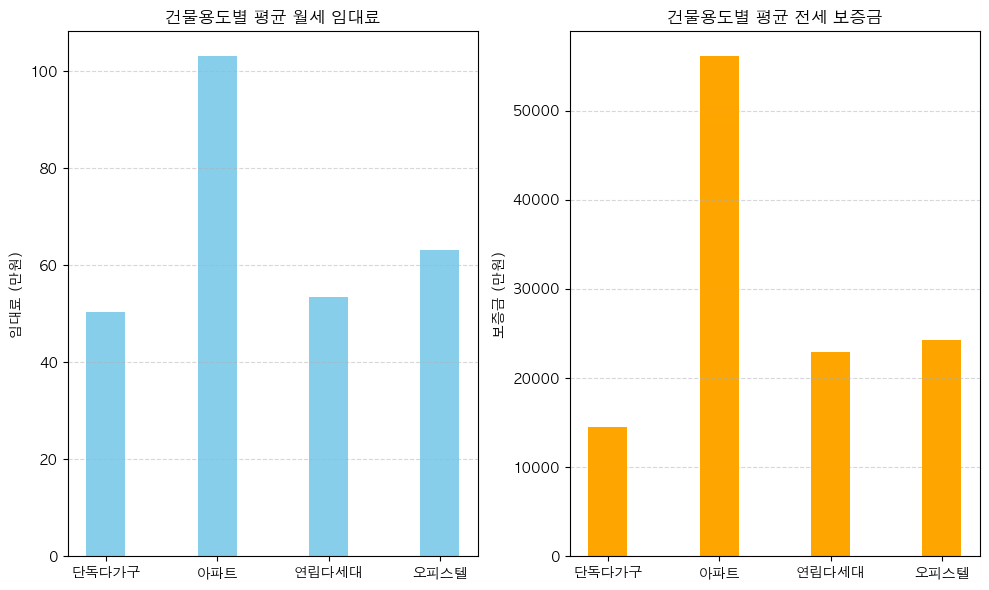

In [38]:
# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
x = np.arange(len(grouped_monthly_rent))  # x 위치
width = 0.35  # 막대 너비

# 첫 번째 그래프: 월세 임대료
ax1.bar(x, merged_df['월세'], width, color='skyblue')
ax1.set_title('건물용도별 평균 월세 임대료')
ax1.set_ylabel('임대료 (만원)')
ax1.set_xticks(x)
ax1.set_xticklabels(grouped_monthly_rent['건물용도'].unique())
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# 두 번째 그래프: 전세보증금
ax2.bar(x, merged_df['전세'], width, color='orange')
ax2.set_title('건물용도별 평균 전세 보증금')
ax2.set_ylabel('보증금 (만원)')
ax2.set_xticks(x)
ax2.set_xticklabels(grouped_monthly_rent['건물용도'].unique())
ax2.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

위 그래프를 비교해보면, '단독다가구'와 '연립다세대' 사이의 차이가 월세 임대료에서는 크지 않았는데 전세 보증금에서는 확연히 큰 차이를 보이는 것을 확인할 수 있습니다.

---

### 3.3. 층별 거래량 및 임대료 분석


>🛗 "엘리베이터를 오래 기다리는 건 별로야... 새로 살 집은 계단으로 걸어 올라갈 수 있는 낮은 층으로 찾아보자!"

층별 거래량 및 임대료를 비교해 봅시다.

층별 거래량을 확인하기 위해, `rental_df`에서 `층`을 기준으로 그룹화하여 거래 수를 계산해 볼까요?

In [39]:
# 층별 거래량 계산
grouped = rental_df.groupby(['층']).size().reset_index(name='counts')
grouped = grouped.sort_values(by='counts', ascending=False)
grouped.head(10)

,층,counts
6,3.0,49637
5,2.0,47426
7,4.0,44058
8,5.0,35321
9,6.0,24954
10,7.0,20728
4,1.0,19751
11,8.0,19058
12,9.0,17934
13,10.0,16790


전월세를 모두 합하여 거래량을 계산했을 때, 2 ~ 5층 사이의 거래량이 굉장히 활발한 것을 확인할 수 있습니다.

이번에는 전월세를 구분하여 층별 거래량을 살펴볼까요?

In [40]:
# 층별 거래량 계산
grouped = rental_df.groupby(['층', '전월세구분']).size().reset_index(name='counts')
grouped = grouped.sort_values(by='counts', ascending=False)
grouped.head(10)

,층,전월세구분,counts
10,3.0,월세,25632
11,3.0,전세,24005
9,2.0,전세,23822
8,2.0,월세,23603
12,4.0,월세,23297
13,4.0,전세,20760
14,5.0,월세,18608
15,5.0,전세,16712
16,6.0,월세,12823
17,6.0,전세,12131


전월세를 구분하여 내림차순으로 정렬해봤을 때도 순위가 층별로 유지되는 것을 보니, 전세와 월세에 따른 층별 거래량 차이는 없는 것 같네요.

다음으로는 층별 월세 임대료와 전세 보증금의 평균 분포를 살펴볼까요?     

In [41]:
# 층별 월세 임대료 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '월세')
]

grouped_monthly_rent = filtered_df.groupby(['층'])['임대료(만원)'].mean().reset_index(name='월세')
grouped_monthly_rent = grouped_monthly_rent.sort_values(by='월세', ascending=True)
grouped_monthly_rent.head(10)

,층,월세
54,56.0,40.000000
0,-2.0,44.214286
1,-1.0,45.046059
3,2.0,60.210566
4,3.0,62.195888
5,4.0,64.736490
6,5.0,66.948356
2,1.0,70.060400
7,6.0,72.762692
8,7.0,76.615046


층이 높아질 수록 비교적 월세 임대료가 높아지는 것을 볼 수 있네요!

이번엔 층별 전세 보증금도 살펴봅시다.

In [42]:
# 층별 전세 보증금 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '전세')
]

grouped_key_money = filtered_df.groupby(['층'])['보증금(만원)'].mean().reset_index(name='전세')
grouped_key_money = grouped_key_money.sort_values(by='전세', ascending=True)
grouped_key_money.head(10)

,층,전세
3,-1.0,13052.543174
5,2.0,31990.301150
6,3.0,32961.432535
7,4.0,34812.443931
2,-2.0,36271.428571
4,1.0,36903.852854
8,5.0,37753.957815
9,6.0,43070.930673
10,7.0,45455.789919
11,8.0,46209.516324


마찬가지로 층이 높아질 수록 비교적 전세 보증금도 높아지는 것을 확인할 수 있습니다.

---

### <span style="font-size:24px">[Quiz 1]</span>

❓3층의 월세 임대료 평균이 가장 낮은 자치구는 어디일까요?

- 조건:
    - `rental_df`에서 `전월세구분`이 '월세'이고 `층`이 '3'층인 행만 필터링하고, `자치구명`을 기준으로 그룹화하여 `임대료(만원)`의 평균을 계산하였을 때 값이 가장 작은 자치구
    - `자치구명` 값 그대로 입력
- 답안 형식:
    - `quiz_1` 변수에 답안을 `string` 형식으로 저장 (예: "관악구")

In [56]:
# 힌트:
# 앞서 월세인 경우만 필터링했던 코드를 참고하여 '월세'와 '3층'인 경우만 필터링합니다.
# 참고) filtered_df = rental_df[(rental_df['전월세구분'] == '월세')]
# 이후 '자치구명'을 기준으로 그룹화하여 임대료를 계산합니다.
# 참고) grouped = rental_df.groupby(['건물용도'])['임대료(만원)'].mean()
# 내림차순 정렬하여 값이 가장 작은 자치구명을 확인합니다.
filtered_df = rental_df[(rental_df["전월세구분"]=="월세") & (rental_df["층"]==3.0)] 
grouped = filtered_df.groupby(["자치구명"])["임대료(만원)"].mean().reset_index(name="월세").sort_values('월세')
grouped.head(1)


,자치구명,월세
24,중랑구,49.817577


In [53]:
# 답안 저장 (예: quiz_1 = "관악구")
quiz_1 = "중랑구"

---

### 3.4. 임대면적 및 건축년도에 따른 임대료 분석


>🤔 "아무래도 신축 건물일수록 임대료가 비싸겠지?"

임대면적 및 건축년도에 따른 임대료를 시각화하고 상관관계를 분석해 봅시다.

먼저 `rental_df`에서 월세 거래만을 필터링하고, `임대면적`을 기준으로 그룹화하여 임대료 평균을 계산해 볼까요?

In [57]:
# 임대면적 기준 월세 임대료 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '월세')
]

grouped = filtered_df.groupby(['임대면적'])['임대료(만원)'].mean().reset_index(name='월세')
grouped

,임대면적,월세
0,5.69,31.333333
1,7.18,45.000000
2,7.68,55.000000
3,7.84,38.500000
4,7.92,45.000000
...,...,...
14756,280.01,35.000000
14757,296.82,550.000000
14758,329.25,43.333333
14759,359.66,130.000000


임대면적과 월세 임대료의 관계를 직관적으로 살펴보기 위해 산점도를 그려봅시다.

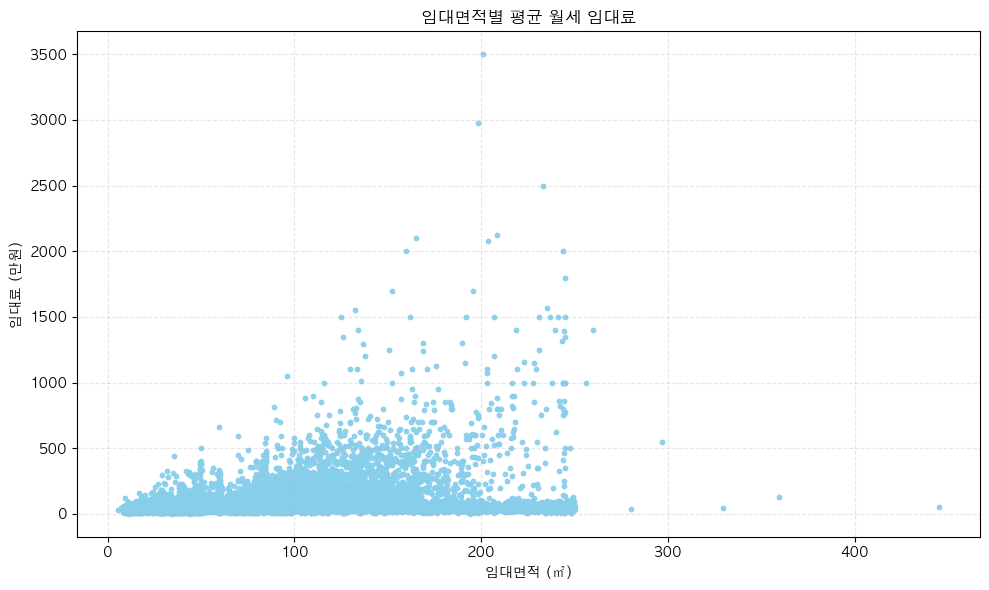

In [58]:
# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(grouped['임대면적'], grouped['월세'], alpha=0.9, s=10, color='skyblue')
plt.title('임대면적별 평균 월세 임대료')
plt.xlabel('임대면적 (㎡)')
plt.ylabel('임대료 (만원)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

산점도를 살펴보면, 임대면적이 넓을 수록 임대료도 높은 경향을 보이는 것 같습니다.

이번엔 상관분석을 통해 임대면적과 월세 임대료의 관계를 수치화해 봅시다.

In [59]:
# 상관계수 계산
grouped[['임대면적', '월세']].corr()

,임대면적,월세
임대면적,1.000000,0.266372
월세,0.266372,1.000000


상관계수는 약 0.27 정도로 비교적 낮은 상관관계를 보이지만, 값이 0 이상이므로 임대면적이 넓을 수록 월세 임대료도 높아지는 경향이 조금은 보인다고 말할 수 있겠습니다. 

이번엔 월세 임대료 대신 '전세 보증금'에 대해서도 산점도와 상관계수를 살펴볼까요?

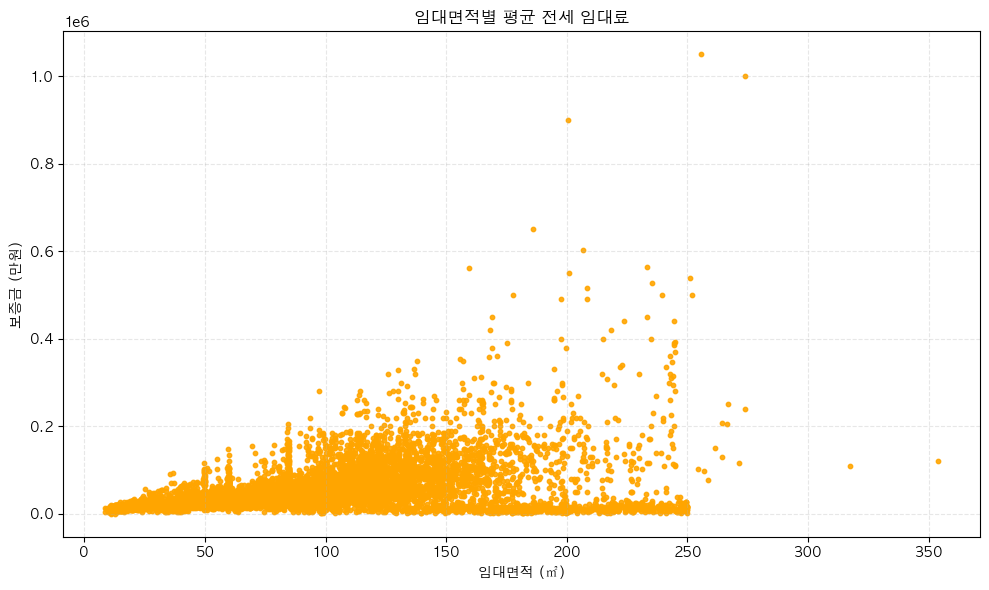

In [60]:
# 임대면적 기준 전세 보증금 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '전세')
]

grouped = filtered_df.groupby(['임대면적'])['보증금(만원)'].mean().reset_index(name='전세')

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(grouped['임대면적'], grouped['전세'], alpha=0.9, s=10, color='orange')
plt.title('임대면적별 평균 전세 임대료')
plt.xlabel('임대면적 (㎡)')
plt.ylabel('보증금 (만원)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [61]:
grouped[['임대면적', '전세']].corr()

,임대면적,전세
임대면적,1.00000,0.50524
전세,0.50524,1.00000


임대면적과 전세 보증금의 상관계수는 약 0.5로 앞선 월세 임대료와의 상관계수보다 높습니다.   
즉 임대면적이 넓을 수록 전세 보증금이 높아지는 경향이 더 강하다는 것을 알 수 있습니다.

다음으로 주제를 조금 바꿔서, '건축년도'에 따른 임대료 차이를 분석해 볼까요?     
앞서 임대면적을 기준으로 분석했던 코드를 참고해서, 건축년도를 기준으로 그룹화해 월세 임대료의 평균을 계산해 봅시다.

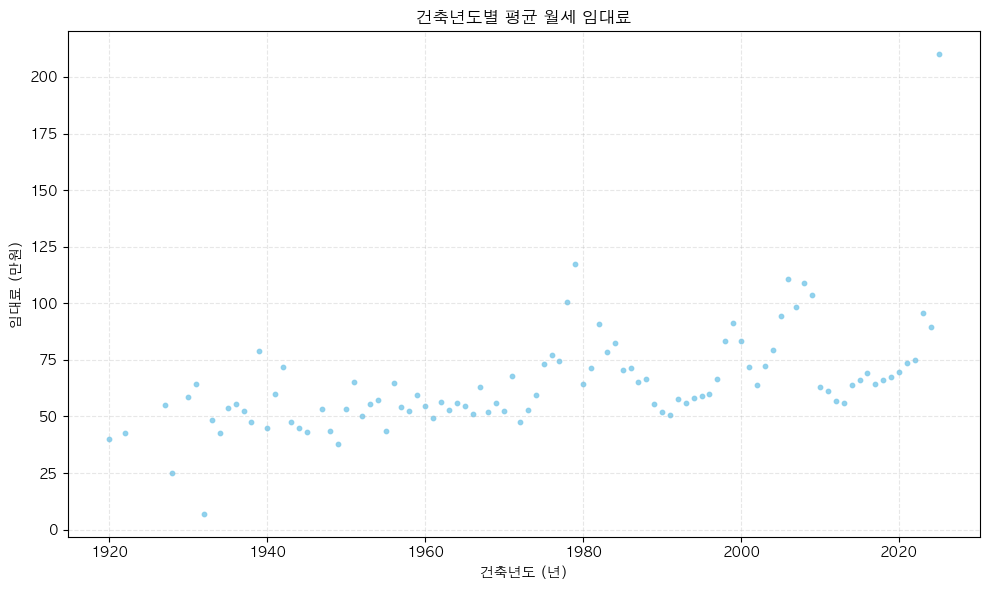

In [62]:
# 건축년도별 월세 임대료 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '월세')
]

grouped = filtered_df.groupby(['건축년도'])['임대료(만원)'].mean().reset_index(name='월세')

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(grouped['건축년도'], grouped['월세'], alpha=0.9, s=10, color='skyblue')
plt.title('건축년도별 평균 월세 임대료')
plt.xlabel('건축년도 (년)')
plt.ylabel('임대료 (만원)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [63]:
# 상관계수 계산
grouped[['건축년도', '월세']].corr()

,건축년도,월세
건축년도,1.000000,0.554449
월세,0.554449,1.000000


위 산점도와 상관계수를 통해 알 수 있듯, 건축년도가 최근일수록 월세 임대료가 더 높아지는 경향을 보이고 있습니다.

이번엔 전세 보증금에 대해서도 산점도와 상관계수를 분석해봅시다.

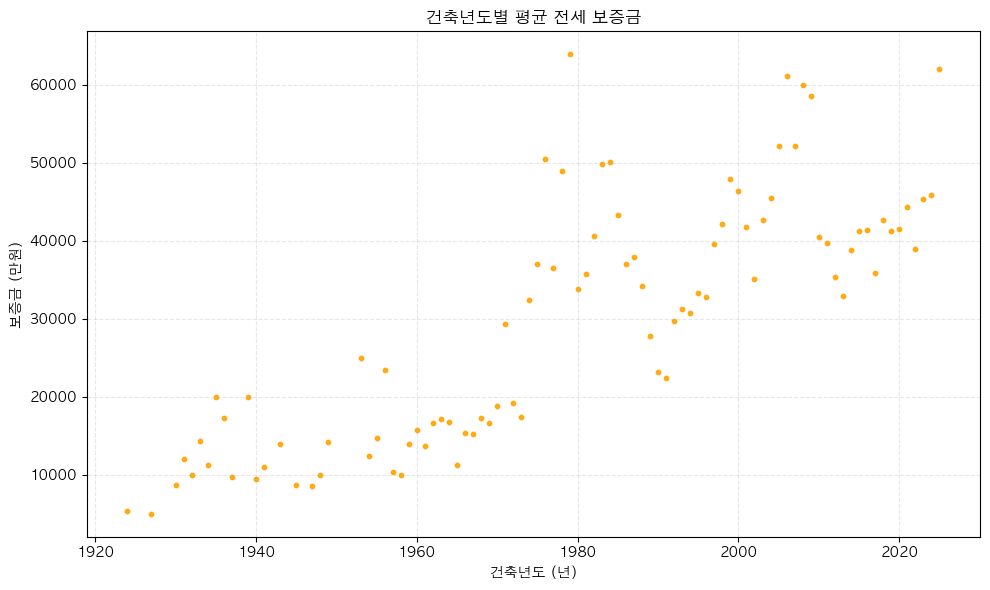

In [64]:
# 건축년도별 전세 보증금 평균 계산
filtered_df = rental_df[
    (rental_df['전월세구분'] == '전세')
]

grouped = filtered_df.groupby(['건축년도'])['보증금(만원)'].mean().reset_index(name='전세')

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(grouped['건축년도'], grouped['전세'], alpha=0.9, s=10, color='orange')
plt.title('건축년도별 평균 전세 보증금')
plt.xlabel('건축년도 (년)')
plt.ylabel('보증금 (만원)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [65]:
# 상관계수 계산
grouped[['건축년도', '전세']].corr()

,건축년도,전세
건축년도,1.000000,0.813284
전세,0.813284,1.000000


상관계수가 약 0.81로, 건축년도와 전세 보증금은 상당히 높은 상관관계를 가지고 있네요!

---

### 3.5. 월별 거래량 변화 시각화

>📈 "일년 중 부동산 거래가 가장 활발한 시기는 언제일까?"   

2024년 부동산 거래 데이터를 기반으로 월별 전월세 거래량 변화를 시각화해 봅니다.

먼저 분석을 위해 `rental_df`에서 계약일 기준 2024년 데이터만 필터링하고, 월세/전세 거래를 구분해 저장합시다.

In [66]:
# 2024년 데이터만 필터링
rental_df_2024 = rental_df[rental_df['계약일'].dt.year == 2024].copy()

# 월세 거래
filtered_df_monthly_rent = rental_df_2024[rental_df_2024['전월세구분'] == '월세']

# 전세 거래
filtered_df_key_money = rental_df_2024[rental_df_2024['전월세구분'] == '전세']

이제 월세와 전세 데이터 각각 월별 거래 건수를 집계해 볼까요?

In [67]:
# 월별 월세 거래 건수 집계
monthly_rent = filtered_df_monthly_rent['계약일'].dt.month.value_counts().sort_index()
monthly_rent

계약일
1     28356
2     24294
3     26067
4     22705
5     24229
6     23585
7     24393
8     24556
9     20661
10    24319
11    22959
12    16293
Name: count, dtype: int64

In [68]:
# 월별 전세 거래 건수 집계
key_money = filtered_df_key_money['계약일'].dt.month.value_counts().sort_index()
key_money

계약일
1     22623
2     19042
3     21661
4     19177
5     19864
6     18560
7     19211
8     18868
9     15054
10    18557
11    15691
12    12318
Name: count, dtype: int64

직관적인 비교를 위해 두 데이터를 하나의 그래프로 나타내 봅시다.

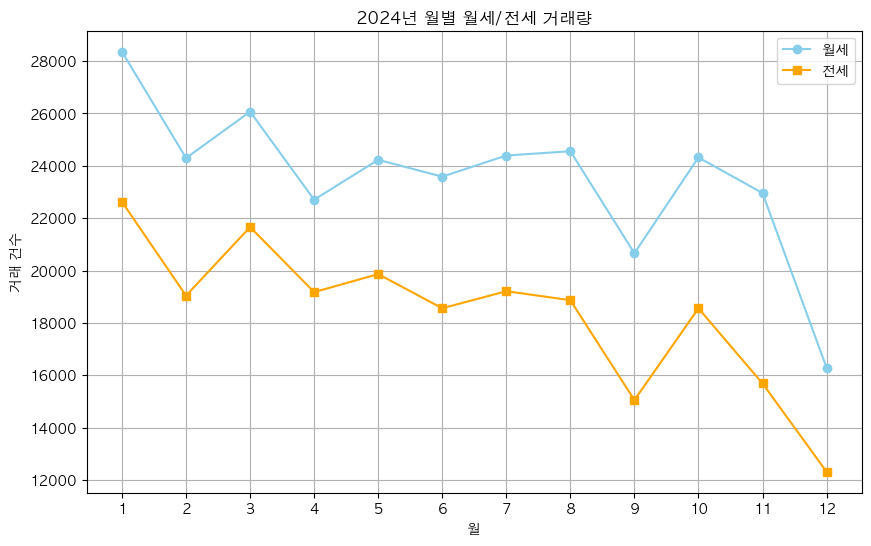

In [69]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_rent.index, monthly_rent.values, marker='o', label='월세', color='skyblue')
plt.plot(key_money.index, key_money.values, marker='s', label='전세', color='orange')
plt.title('2024년 월별 월세/전세 거래량')
plt.xlabel('월')
plt.ylabel('거래 건수')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

월세와 전세 모두 월별 거래량 패턴이 비슷한 것을 볼 수 있습니다.    
거래 건수는 1월에 가장 많고, 2월에 주춤했다가 3월에 다시 상승합니다.     
또한 월세와 전세 모두 9월과 12월에 큰 폭으로 감소하네요.

'건물용도'를 기준으로 나누어 비교해보면 거래량의 패턴이 다를까요?      
앞서 분석에 사용했던 코드를 참고해, 건물용도별 거래 건수 그래프를 그려봅시다.

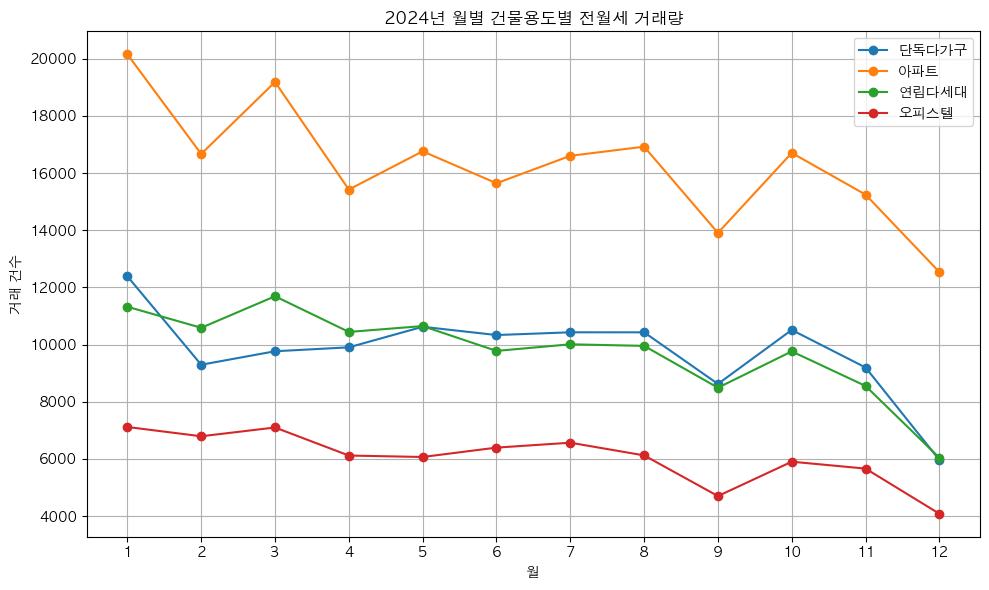

In [70]:
# 계약일에서 월 추출
rental_df_2024['계약월'] = rental_df_2024['계약일'].dt.month

# 건물용도와 계약월 기준으로 그룹화해서 거래 건수 집계
usage_monthly_counts = rental_df_2024.groupby(['건물용도', '계약월']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
for usage in usage_monthly_counts.index:
    plt.plot(usage_monthly_counts.columns, usage_monthly_counts.loc[usage], marker='o', label=usage)

plt.title('2024년 월별 건물용도별 전월세 거래량')
plt.xlabel('월')
plt.ylabel('거래 건수')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


건물용도별 전월세 거래량을 비교해보았을 때, 역시 대부분 비슷한 패턴을 가지고 있습니다.   
'단독다가구'와 '연립다세대'의 경우 거래량이 매우 비슷한데, 1월 ~ 3월의 거래량에서만 차이를 보이는 점이 흥미롭네요.

---

### 3.6. 계약 기간 및 신규 계약 여부 분석

>🤝 "건물 용도별 전월세 계약 기간은 보통 몇 년일까?"

부동산 거래의 계약 기간 평균 및 신규 계약 여부를 분석해 봅시다.

앞서 2. 데이터 정제하기에서 `계약기간` 컬럼을 `datetime` 타입으로 변환하여 `계약시작` 및 `계약종료` 컬럼으로 구분했던 과정을 기억하시나요?    
이번 분석에 사용할 계약 기간 관련 컬럼들을 다시 살펴봅시다.

In [71]:
# 계약 기간 관련 컬럼 확인
rental_df[['계약기간', '계약시작', '계약종료']]

,계약기간,계약시작,계약종료
0,23.11~25.11,2023-11-01,2025-11-01
1,23.12~24.12,2023-12-01,2024-12-01
2,23.12~25.12,2023-12-01,2025-12-01
3,23.12~25.12,2023-12-01,2025-12-01
4,24.01~26.01,2024-01-01,2026-01-01
...,...,...,...
521980,25.03~25.06,2025-03-01,2025-06-01
521981,24.08~26.08,2024-08-01,2026-08-01
521982,24.09~26.09,2024-09-01,2026-09-01
521983,25.03~26.02,2025-03-01,2026-02-01


계약 기간의 평균을 구하기 위해서는 `계약시작`과 `계약종료` 컬럼을 기준으로 '일(day)'을 계산해야 합니다.    
다음과 같이 총 계약일을 계산하여 `계약기간_일`이라는 새로운 컬럼으로 저장해 봅시다.

In [72]:
# 총 계약일 계산
rental_df['계약기간_일'] = (rental_df['계약종료'] - rental_df['계약시작']).dt.days
rental_df[['계약기간', '계약시작', '계약종료', '계약기간_일']]

,계약기간,계약시작,계약종료,계약기간_일
0,23.11~25.11,2023-11-01,2025-11-01,731.0
1,23.12~24.12,2023-12-01,2024-12-01,366.0
2,23.12~25.12,2023-12-01,2025-12-01,731.0
3,23.12~25.12,2023-12-01,2025-12-01,731.0
4,24.01~26.01,2024-01-01,2026-01-01,731.0
...,...,...,...,...
521980,25.03~25.06,2025-03-01,2025-06-01,92.0
521981,24.08~26.08,2024-08-01,2026-08-01,730.0
521982,24.09~26.09,2024-09-01,2026-09-01,730.0
521983,25.03~26.02,2025-03-01,2026-02-01,337.0


23년 12월에서 24년 12월까지의 계약인 경우 366일로 계산이 된 것을 확인할 수 있습니다.

이제 계약 기간에 대한 통계 분석을 진행해 볼까요?    
우선 평균과 최대/최소값 등 기술통계량을 살펴봅시다. 

In [73]:
# 계약 기간 기술통계량
rental_df['계약기간_일'].describe()

count    479742.000000
mean        670.974251
std         194.063560
min       -8036.000000
25%         730.000000
50%         730.000000
75%         730.000000
max       27697.000000
Name: 계약기간_일, dtype: float64

최소값이 음수(-8036일)이고, 최대값이 27697일(약 76년)입니다.   
이렇게 계약 기간이 잘못 기술되었거나 5년 이상인 경우는 이상치로 간주하고 분석에서 제외하겠습니다.

In [74]:
# 이상치 제외
filtered_df = rental_df[
    (rental_df['계약기간_일'] > 0) &
    (rental_df['계약기간_일'] <= 1825)
]

# 계약 기간 기술통계량
filtered_df['계약기간_일'].describe()

count    479126.000000
mean        669.913964
std         147.750593
min          29.000000
25%         730.000000
50%         730.000000
75%         730.000000
max        1798.000000
Name: 계약기간_일, dtype: float64

이제 최소값은 29일, 최대값은 1798일이 되었습니다.     

이 데이터에 기반하여 계약 기간의 분포를 히스토그램으로 표현해 볼까요?     
x축은 계약 기간 (일), 해당 계약 기간으로 계약한 거래 수입니다. 

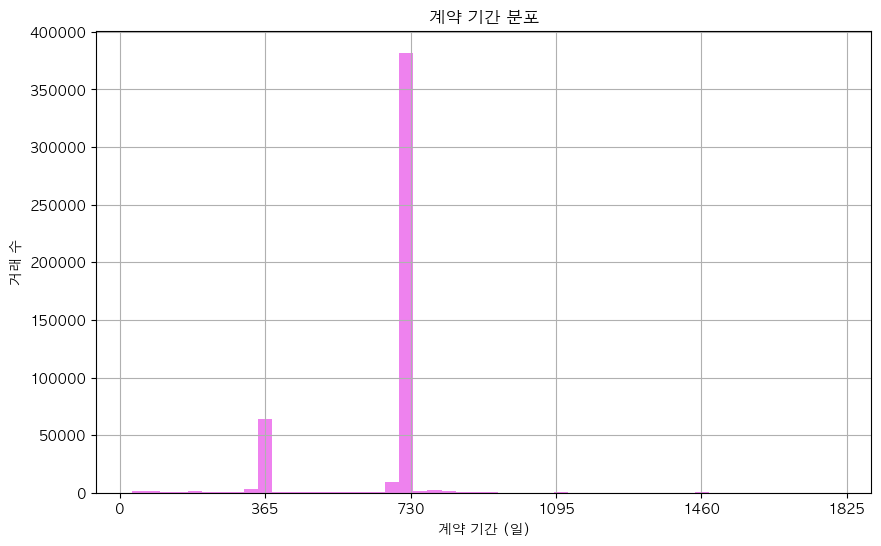

In [75]:
# 시각화
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['계약기간_일'], bins=50, color='violet')
plt.title('계약 기간 분포')
plt.xlabel('계약 기간 (일)')
plt.xticks(np.arange(0, 2000, 365))  # 1년 간격
plt.ylabel('거래 수')
plt.grid(True)
plt.show()

계약 기간의 분포를 살펴보면 2년 단위의 계약이 가장 많은 것을 확인할 수 있습니다.

이번에는 전월세 구분과 건물 용도에 따라 그룹화하여 계약 기간의 평균을 구해봅시다.

In [76]:
# 계약 기간 평균 계산
grouped = filtered_df.groupby(['전월세구분', '건물용도'])['계약기간_일'].mean().reset_index(name='계약기간_일')
grouped

,전월세구분,건물용도,계약기간_일
0,월세,단독다가구,648.346258
1,월세,아파트,681.564574
2,월세,연립다세대,675.181752
3,월세,오피스텔,507.582036
4,전세,단독다가구,720.821536
5,전세,아파트,716.004041
6,전세,연립다세대,713.153799
7,전세,오피스텔,691.999345


오피스텔 월세 거래의 계약기간이 가장 짧았고, 단독다가구의 전세 거래가 계약기간이 가장 길었습니다.

마지막으로, 지역별 신규/갱신 계약 거래량을 살펴보겠습니다.

In [77]:
# 신규계약구분 고유값 확인
rental_df['신규계약구분'].value_counts()

신규계약구분
신규    378062
갱신    119096
1       1164
2        114
Name: count, dtype: int64

'신규', '갱신'으로 분류된 경우만 사용하고 나머지 '1', '2'와 같이 표기된 행은 제외하겠습니다.    
자치구 및 신규 계약 여부로 그룹화하여 거래 수를 계산해 볼까요?

In [78]:
# '신규', '갱신'인 경우만 필터링
filtered_df = rental_df[
    rental_df['신규계약구분'].isin(['신규', '갱신'])
]

# 자치구명 및 신규계약구분 기준으로 그룹화하여 거래 수 계산
grouped = filtered_df.groupby(['자치구명', '신규계약구분']).size().reset_index(name='counts')
grouped

,자치구명,신규계약구분,counts
0,강남구,갱신,8160
1,강남구,신규,22502
2,강동구,갱신,6043
3,강동구,신규,19787
4,강북구,갱신,1484
5,강북구,신규,8282
6,강서구,갱신,8943
7,강서구,신규,26963
8,관악구,갱신,3561
9,관악구,신규,24407


위 데이터는 행이 너무 길어져 한 눈에 살펴보기 어렵습니다.     
자치구별로 신규/갱신 거래 비율을 담은 새로운 데이터를 만드는 것이 좋겠네요.    
각 '자치구명'를 행으로, '신규'과 '갱신'을 열로 만들어 비율로 나타내 봅시다.

>📌 `pivot()`은 데이터를 재구조화하여 행과 열을 기준으로 값을 재배치하는 데 사용됩니다.

In [79]:
# 피벗 테이블 생성
pivot_df = grouped.pivot(index='자치구명', columns='신규계약구분', values='counts').reset_index()
pivot_df.columns.name = None
pivot_df = pivot_df.fillna(0)

# 신규 비율, 갱신 비율 계산
pivot_df['총합'] = pivot_df['신규'] + pivot_df['갱신']
pivot_df['신규_비율'] = pivot_df['신규'] / pivot_df['총합']
pivot_df['갱신_비율'] = pivot_df['갱신'] / pivot_df['총합']

# 신규 비율 기준 내림차순 정렬
result_df = pivot_df[['자치구명', '신규', '갱신', '신규_비율', '갱신_비율']]
result_df = result_df.sort_values('신규_비율', ascending=False).reset_index(drop=True)
result_df

,자치구명,신규,갱신,신규_비율,갱신_비율
0,관악구,24407,3561,0.872676,0.127324
1,강북구,8282,1484,0.848044,0.151956
2,금천구,10165,2072,0.830677,0.169323
3,종로구,5991,1237,0.828860,0.171140
4,동대문구,14351,3262,0.814796,0.185204
5,중랑구,14469,3517,0.804459,0.195541
6,동작구,16269,3960,0.804241,0.195759
7,중구,5758,1475,0.796074,0.203926
8,광진구,17755,4678,0.791468,0.208532
9,구로구,14037,3844,0.785023,0.214977


이제 각 자치구별로 신규/갱신 계약 비율이 깔끔하게 정리되었습니다.     
신규 계약 비율이 가장 높은 지역은 관악구이고, 갱신 계약 비율이 가장 높은 지역은 송파구였네요.

---

### <span style="font-size:24px">[Quiz 2]</span>

❓아파트의 신규 계약 건수는 몇 건일까요?

- 조건:
    - `rental_df`의 `건물용도` 및 `신규계약구분`을 기준으로 그룹화하여 개수 계산
    - `신규계약구분`의 값이 '신규'인 경우만 해당 (**'1', '2', '갱신'은 해당하지 않음**)
- 답안 형식:
    - `quiz_2` 변수에 답안을 `int` 형식으로 저장 (예: 10000)

In [86]:
# 힌트:
# 앞서 자치구명 및 신규계약구분 기준으로 그룹화하여 거래 수를 계산했던 코드를 참고합니다.
# 참고) grouped = filtered_df.groupby(['자치구명', '신규계약구분']).size().reset_index(name='counts')
# '건물용도'와 '신규계약구분'을 기준으로 그룹화하여 거래 수를 계산하고, '아파트'의 '신규' 거래 수를 확인합니다.
grouped = rental_df.groupby(["건물용도", "신규계약구분"]).size().reset_index(name='counts')
filterd = grouped[grouped["신규계약구분"]=="신규"]
filterd

,건물용도,신규계약구분,counts
3,단독다가구,신규,101554
7,아파트,신규,127392
11,연립다세대,신규,89764
15,오피스텔,신규,59352


In [85]:
# 답안 저장 (예: quiz_2 = 10000)
quiz_2 = 127392

---

### 3.7. 월세 보증금과 임대료의 상관관계 분석

>💸 "보증금을 높이면 월세가 좀 저렴해질까?"

월세 보증금과 임대료의 분포를 산점도로 나타내고 상관관계를 분석합니다. 

이번 분석에서는 관악구의 월세 거래만을 활용하겠습니다.    
우선 조건에 맞게 `rental_df`를 필터링합니다.

In [87]:
# 관악구 월세 거래 필터링
filtered_df = rental_df[
    (rental_df['자치구명'] == '관악구') &
    (rental_df['전월세구분'] == '월세') &
    (rental_df['보증금(만원)'] > 0) &
    (rental_df['임대료(만원)'] > 0)
]

filtered_df[['보증금(만원)', '임대료(만원)']]

,보증금(만원),임대료(만원)
89,2000,60
97,3000,68
101,500,32
121,500,60
129,1000,51
...,...,...
521774,2000,55
521824,2834,5
521827,1000,40
521862,300,25


먼저 보증금과 임대료의 기술통계량을 각각 살펴봅시다.

In [88]:
# 보증금 기술통계량
filtered_df['보증금(만원)'].describe()

count    22002.000000
mean      5295.037951
std       7473.437695
min         10.000000
25%       1000.000000
50%       2000.000000
75%       6000.000000
max      70000.000000
Name: 보증금(만원), dtype: float64

In [89]:
# 임대료 기술통계량
filtered_df['임대료(만원)'].describe()

count    22002.000000
mean        50.949595
std         29.819280
min          1.000000
25%         33.000000
50%         48.000000
75%         61.000000
max        300.000000
Name: 임대료(만원), dtype: float64

관악구의 월세 임대료는 평균 약 50만원, 보증금은 약 5000만원 정도입니다.

이제 보증금과 임대료 분포를 산점도로 나타내 볼까요?

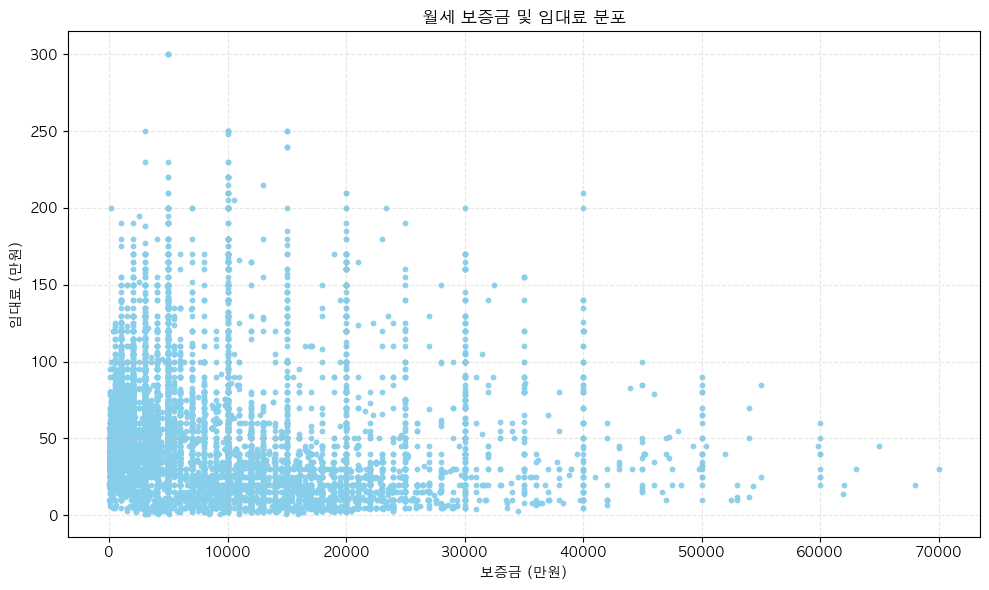

In [90]:
# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['보증금(만원)'], filtered_df['임대료(만원)'], alpha=0.9, s=10, color='skyblue')
plt.title('월세 보증금 및 임대료 분포')
plt.xlabel('보증금 (만원)')
plt.ylabel('임대료 (만원)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

산점도를 보면 보증금이 높아질수록 임대료가 상대적으로 낮아지는 패턴이 보이는 듯 하지만, 데이터가 일정 지역에 몰려있어 정확한 관계 확인이 어렵습니다.     
보증금과 임대료의 상관계수를 구하여 어떤 관계를 보이는지 수치적으로 확인해 볼까요?

In [91]:
# 상관계수 계산
filtered_df[['보증금(만원)', '임대료(만원)']].corr()

,보증금(만원),임대료(만원)
보증금(만원),1.000000,-0.136955
임대료(만원),-0.136955,1.000000


보증금과 임대료는 음의 상관관계를 보이고 있습니다.    
즉, 어느 한쪽이 증가할 수록 다른 한쪽은 감소하는 경향이 있다는 것을 알 수 있네요. 

---

## 4. 퀴즈 제출하기

`3. 데이터 분석하기` 섹션에서 [Quiz] 2개를 모두 완료한 후, 아래 코드를 실행하여 정답을 저장할 수 있습니다.   
저장 후 오른쪽 상단의 '제출' 버튼을 클릭해 주세요.

🟨 **주의 사항**
- 아래 코드를 실행하기 전 `quiz_1`, `quiz_2` 변수가 제대로 저장되었는지, 지정된 타입이 맞는지 반드시 확인해 주세요.
- 아래 코드를 임의로 수정할 경우 채점이 제대로 이루어지지 않을 수 있습니다.

In [92]:
import json

student_answers = {}
student_answers["quiz_1"] = str(quiz_1)
student_answers["quiz_2"] = int(quiz_2)

with open("result.json", "w") as f:
    json.dump(student_answers, f)